In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from exercise1 import bkmeans
from exercise2 import sammon
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

Selected datasets:
1. The Monk's Problems: https://www.openml.org/search?type=data&sort=runs&status=active&id=334

2. Diabetes: https://www.openml.org/search?type=data&sort=runs&status=active&id=37

3. Breast cancer: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [2]:
data1 = pd.read_csv('../A4_datasets/monks-problems-2.csv', header=None).to_numpy()
X1, y1 = data1[:, :-1], data1[:, -1]
y1 = LabelEncoder().fit_transform(y1)

In [3]:
data2 = pd.read_csv('../A4_datasets/diabetes.csv', header=None).to_numpy()
X2, y2 = data2[:, :-1], data2[:, -1]
y2 = LabelEncoder().fit_transform(y2)

In [4]:
data3 = pd.read_csv('../A4_datasets/breast_cancer.csv', delimiter=',').to_numpy()
X3, y3 = data3[:,2: -1], data3[:, 1]
y3 = LabelEncoder().fit_transform(y3)

3.1. Comparison of DR Techniques

In [5]:
# Preprocess the data
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)
X3_scaled = scaler.fit_transform(X3)

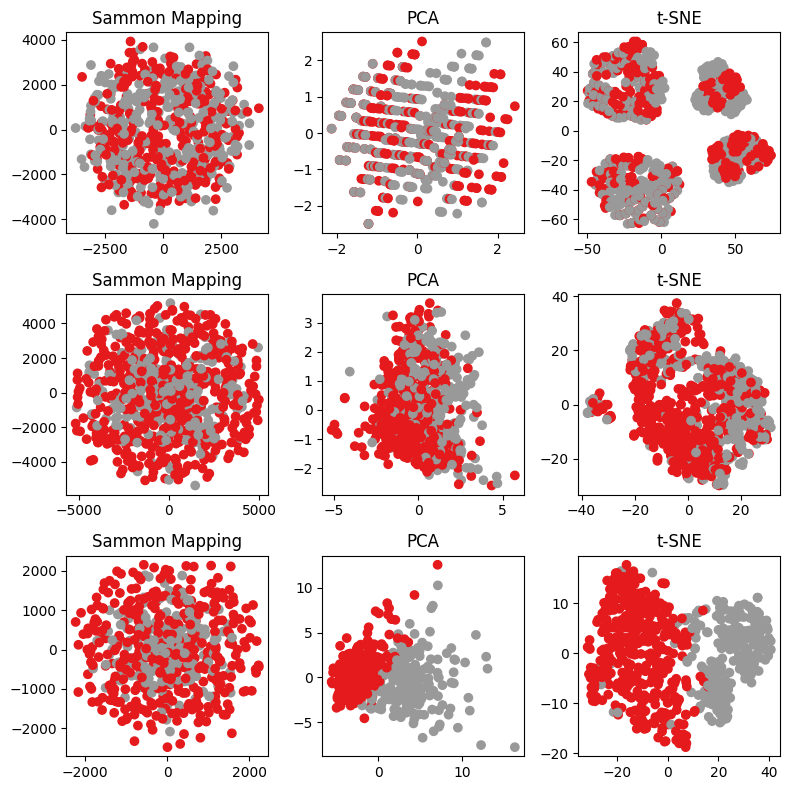

In [6]:
datasets = [X1_scaled, X2_scaled, X3_scaled]
labels = [y1, y2, y3]

# Perform dimensionality reduction and create the scatterplot matrix
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
methods = ['Sammon Mapping', 'PCA', 't-SNE']

for i, dataset in enumerate(datasets):
    # Sammon Mapping
    Y_sammon = sammon(dataset, iter=100, epsilon=1e-5, learning_rate=0.1)
    axes[i, 0].scatter(Y_sammon[:, 0], Y_sammon[:, 1], c=labels[i], cmap='Set1')
    axes[i, 0].set_title(methods[0])

    # PCA
    pca = PCA(n_components=2)
    Y_pca = pca.fit_transform(dataset)
    axes[i, 1].scatter(Y_pca[:, 0], Y_pca[:, 1], c=labels[i], cmap='Set1')
    axes[i, 1].set_title(methods[1])

    # t-SNE
    tsne = TSNE(n_components=2)
    Y_tsne = tsne.fit_transform(dataset)
    axes[i, 2].scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=labels[i], cmap='Set1')
    axes[i, 2].set_title(methods[2])

plt.tight_layout()
plt.show()

In your opinion, which technique performed the best for each data set, regarding the separation of the classes? How are the classes in the data sets separated? Are some classes easier to separate than others?

    In all three datasets PCA gave the best result since it was able to reduce the dimensionality, doing the best sepration of the classes. The 3 datasets contains two possible classes, and the monks problem classes are easier to separate.

3.2. Comparison of Clustering Techniques

In [7]:
dataset1 = (X1, y1)  
dataset2 = (X2, y2)  
dataset3 = (X3, y3)  

datasets = [dataset1, dataset2, dataset3]

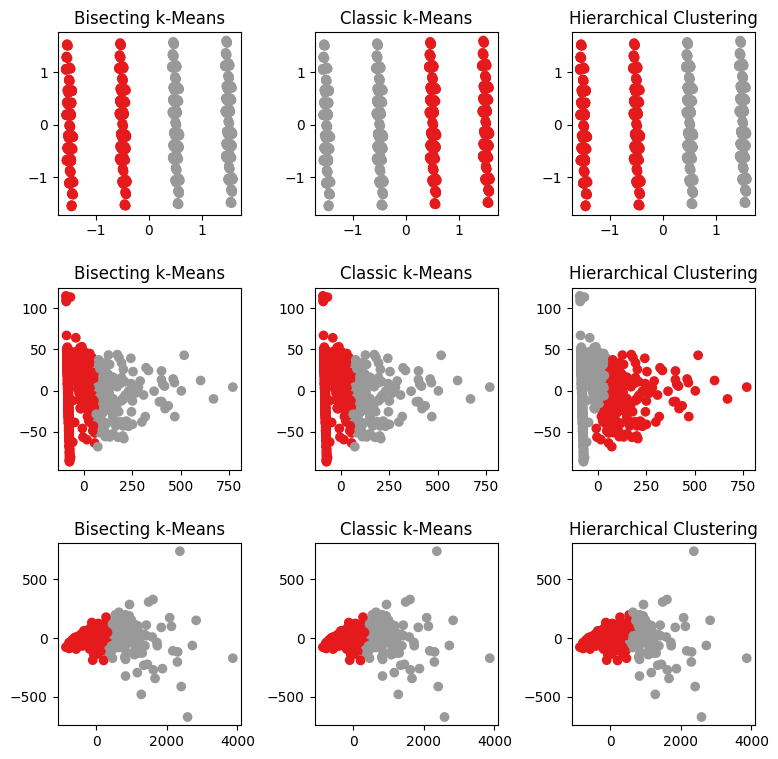

In [8]:
def compare_clustering_techniques(datasets):
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, dataset in enumerate(datasets):
        X = dataset[0]

        pca = PCA(n_components=2)
        X_dr = pca.fit_transform(X)
    

        # Apply clustering techniques
        clustering_techniques = {
            'Bisecting k-Means': lambda X: bkmeans(X, k=2, iter=10),
            'Classic k-Means': KMeans(n_clusters=2, n_init=10),
            'Hierarchical Clustering': AgglomerativeClustering(n_clusters=2)
        }

        for j, (cluster_technique, clf) in enumerate(clustering_techniques.items()):
            ax = axes[i, j]

            if cluster_technique == 'Bisecting k-Means':
                labels = clf(X_dr)
            else:
                labels = clf.fit_predict(X_dr)

            ax.scatter(X_dr[:, 0], X_dr[:, 1], c=labels, cmap='Set1')
            ax.set_title(cluster_technique)

    plt.show()

compare_clustering_techniques(datasets)

<!-- def compare_clustering_techniques(datasets, technique):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, dataset in enumerate(datasets):
        X, y = dataset

        if technique == 't-SNE':
            tsne = TSNE(n_components=2)
            X_dr = tsne.fit_transform(X)
        else:
            print("Invalid dimensionality reduction technique.")
            return

        # Apply clustering techniques
        clustering_techniques = {
            'Bisecting k-Means': KMeans(n_clusters=3),
            'Classic k-Means': KMeans(n_clusters=3),
            'Hierarchical Clustering': AgglomerativeClustering(n_clusters=3)
        }

        for j, (cluster_technique, clf) in enumerate(clustering_techniques.items()):
            ax = axes[i, j]
            labels = clf.fit_predict(X_dr)

            ax.scatter(X_dr[:, 0], X_dr[:, 1], c=labels, cmap='Set3')
            ax.set_title(cluster_technique)

    plt.show()

datasets = [dataset1, dataset2, dataset3]
technique = 't-SNE'

compare_clustering_techniques(datasets, technique) 

 In your opinion, which clustering technique performed the
best for each data set? How are the clusters in the data sets separated? Are some clusters easier to separate than
others?

    In the 3 datasets, all the 3 algorithms performed very similarly.
    For the Monks dataset (first one), KMeans and Hierarchical clustering were the best, while BKMeans was able to differentiate correctly the clusters, but in an inverted way.
    For the Diabetes dataset (second one), BKMeans and KMeans had very similar results, while Hierarchical clustering inverted the cluster this time.
    For Breast Cancer, again, KMeans and Hierarchical clustering were the best, while BKMeans was able to differentiate correctly the clusters, but in an inverted way.
    Both Diabetes and Breast Cancer are harder to separate, as we can see, the clusters are very closer, being hard to detect a threshold.